In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The dataset is of a superstores located in United States where we will be predicting future sales with the help of machine learning technique.This dataset provides a detailed view of a online sales activities, customer base, and product performance, delivering critical insights for strategic decision-making.

In [2]:
df = pd.read_csv('US_Superstore.csv')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/17,16/06/17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/17,28/05/17,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Finding missing values values in the dataset**

In [6]:
null_values_per_column = df.isnull().sum()

print("Number of null values per column:")
print(null_values_per_column)

Number of null values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


**Generated a new CSV file containing the dataset without any missing values**

In [7]:
cleaned_df = df.dropna()
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [8]:
df = pd.read_csv('cleaned_dataset.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/17,16/06/17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/16,18/10/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9796,CA-2017-125920,21/05/17,28/05/17,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9785,9797,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9786,9798,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9787,9799,CA-2016-128608,12/01/16,17/01/16,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


**Checking to make sure that there are no missing values in any of the columns**

In [9]:
null_values_per_column = df.isnull().sum()

print("Number of null values per column:")
print(null_values_per_column)

Number of null values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


**I have calculated the minimum, maximum, count, and mean values of sales across various states**

In [10]:
df_2 = df.groupby('State').Sales.agg(['count','min','max','mean'])
df_2

,count,min,max,mean
State,,,,
Alabama,61,3.620,3040.000,319.846557
Arizona,223,1.408,1879.960,158.173350
Arkansas,60,4.300,1793.980,194.635500
California,1946,0.990,8187.650,229.345562
Colorado,179,1.080,2549.985,177.886022
Connecticut,82,3.520,1133.350,163.223866
Delaware,93,3.380,10499.970,293.795688
District of Columbia,10,9.640,1379.920,286.502000
Florida,373,1.167,22638.480,237.095260


**Visualizing Sales count by States**

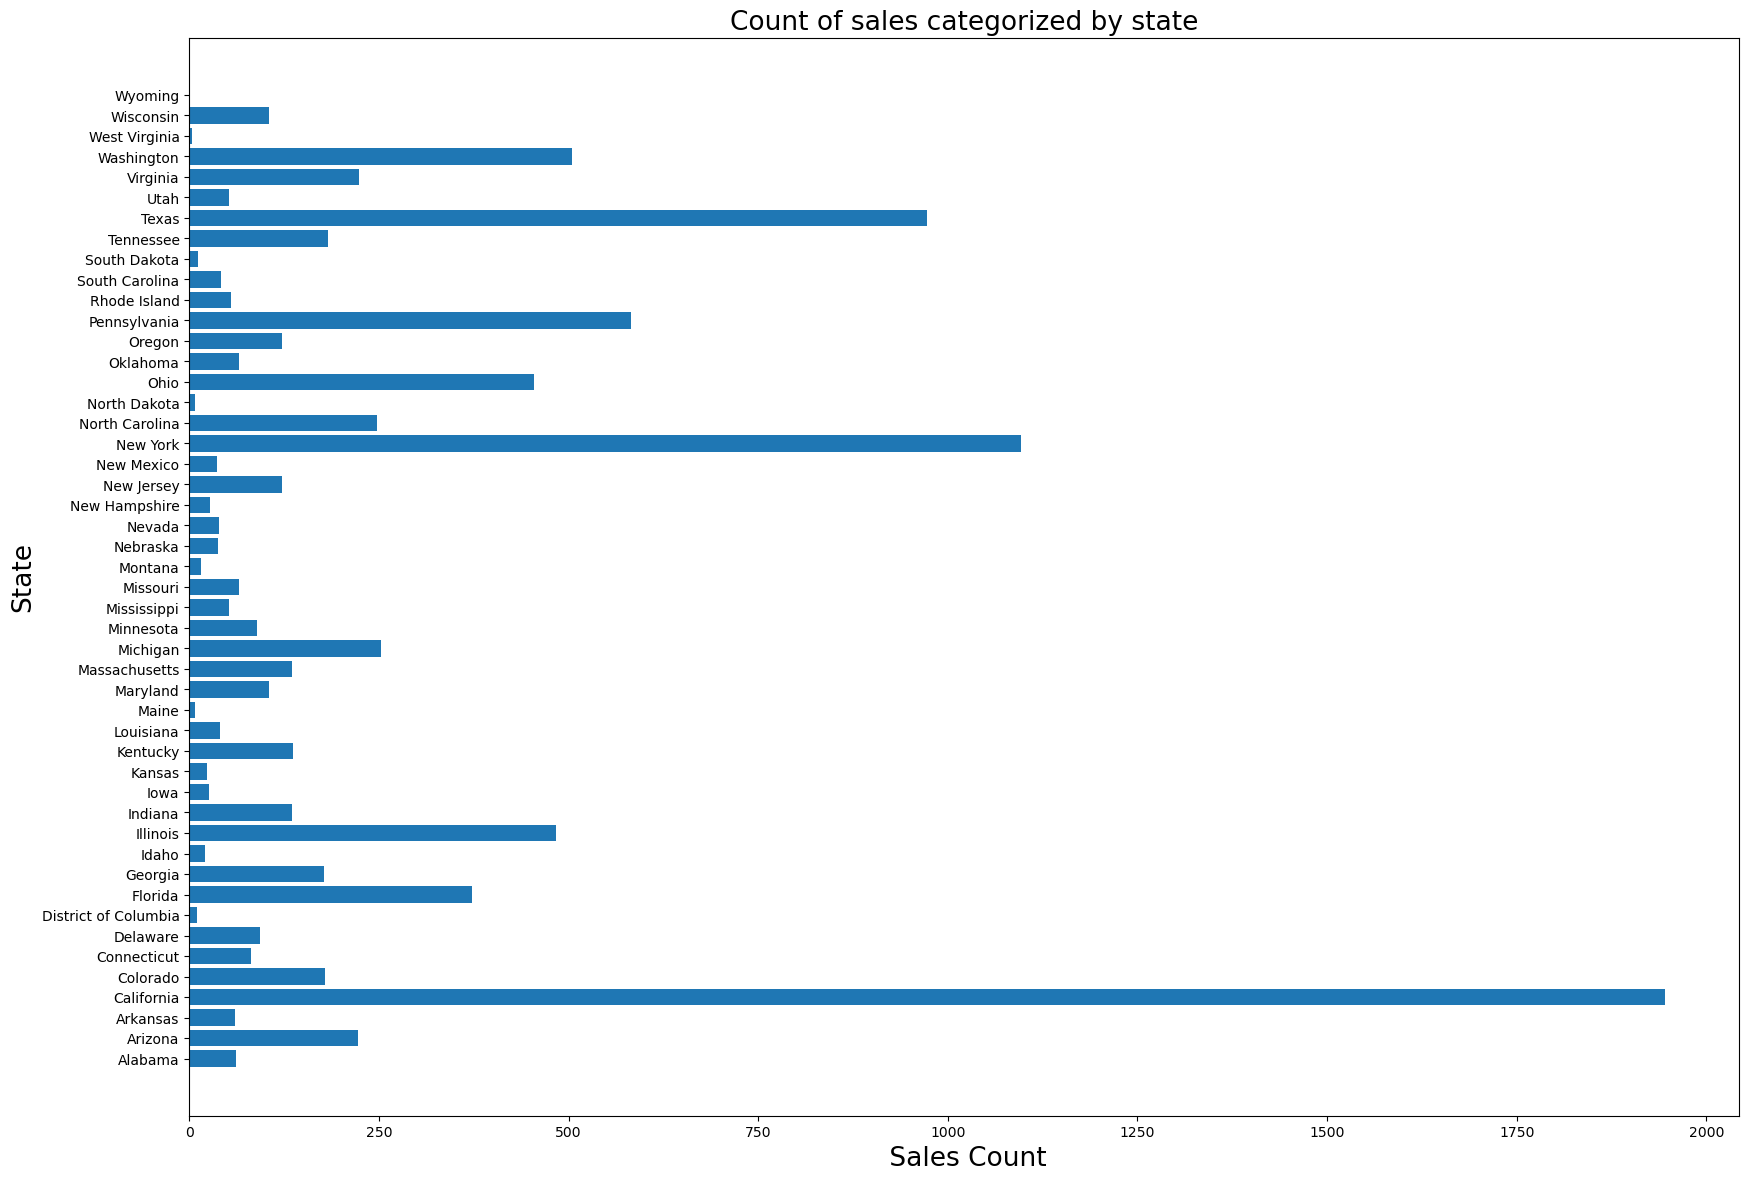

In [11]:
plt.figure(figsize=(20, 14))
plt.barh(df_2.index, df_2['count'])
plt.xlabel(' Sales Count',fontsize=19)
plt.ylabel('State',fontsize=19)
plt.title('Count of sales categorized by state',fontsize=19)
plt.show()

**Here, I have converted 'Order Date' in a dataframe to datetime, aggregated sales data by date, ploted the aggregated sales over time, and displayed the plot. It concludes by showing the first few rows of the aggregated data.**

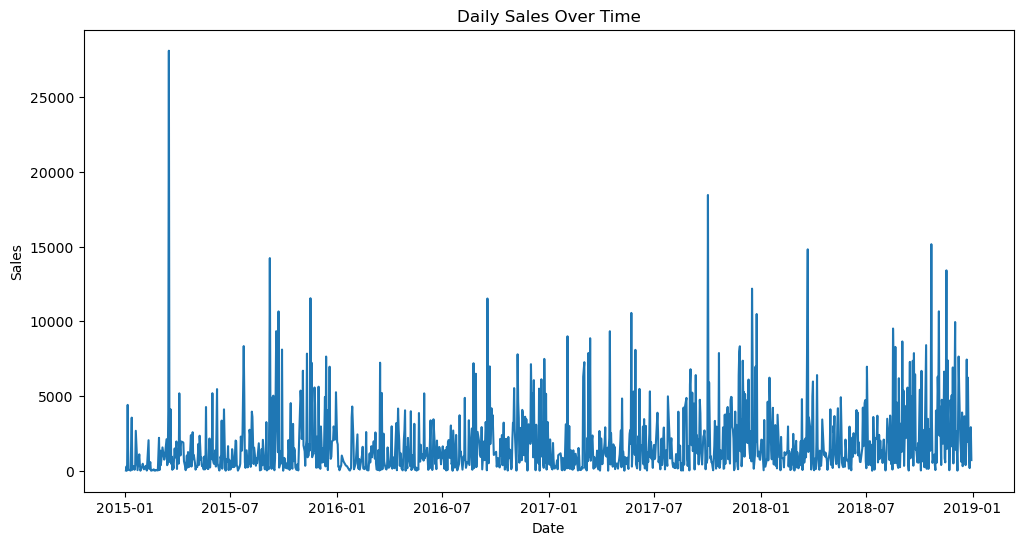

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%y')
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

### How widely used is each shipping method?

In [13]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

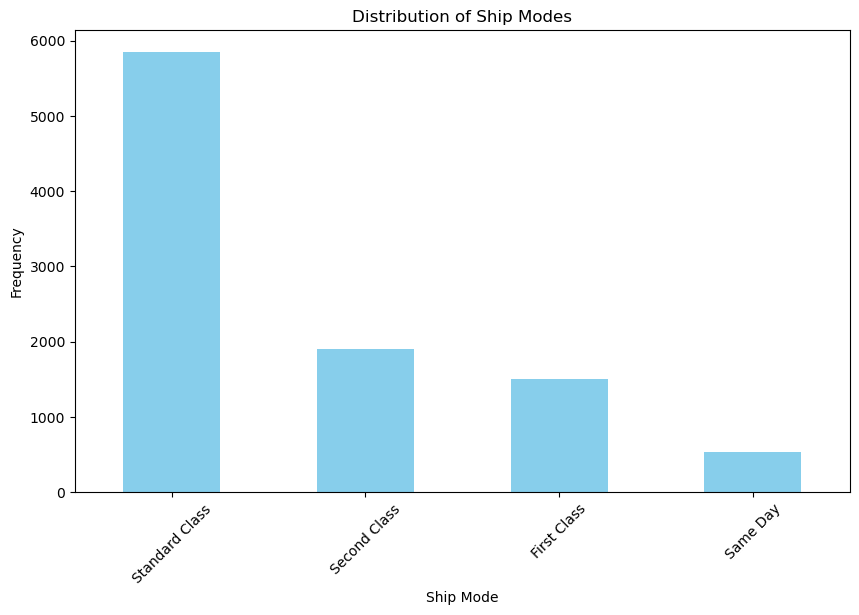

In [14]:
ship_mode_counts = df["Ship Mode"].value_counts()

plt.figure(figsize=(10, 6))  
ship_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()


**The distribution of delivery options for a selection of orders is shown in the chart, which is a bar graph. Four categories are displayed, each bar denoting a different shipping method: "Standard Class," "Second Class," "First Class," and "Same Day." With 5,849 orders, "Standard Class" is the most popular delivery option. It is followed by "Second Class" (1,901), "First Class" (1,501 orders), and "Same Day" (538 orders). The bars' heights show how many orders there are for each delivery option, amply demonstrating that "Standard Class" is the most popular option.**

### Which is the most used shipping class?

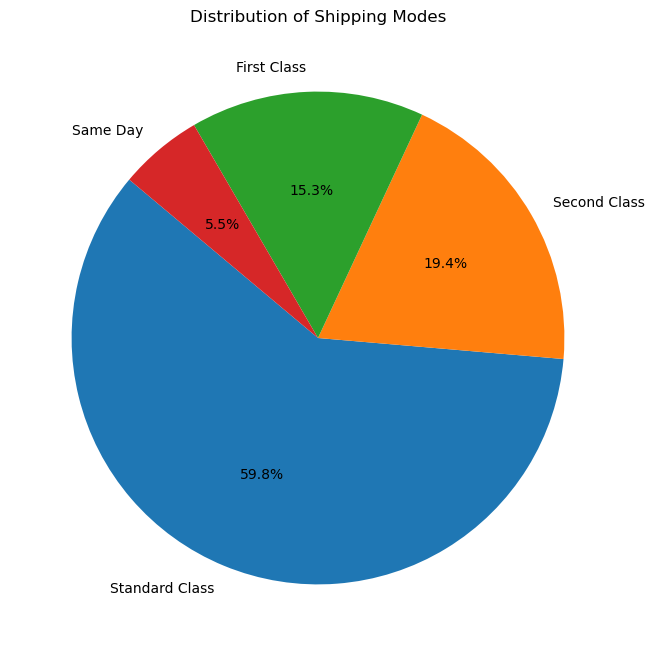

In [15]:
value_counts = df['Ship Mode'].value_counts(normalize=True)

plt.figure(figsize=(8, 8)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Shipping Modes')
plt.show()


**As can be seen from the pie chart, 59.8% of customers chose a Standard class, indicating a significant preference among consumers. This huge majority implies that this class is quite popular or has characteristics that customers find particularly desirable. Gaining an understanding of these characteristics could help with customized marketing strategies and product improvements to better suit customer needs by offering insightful information about consumer preferences and habits**

**Which region should be targeted for an increased marketing budget to enhance customer engagement, and within that region, which product category should receive the most focus based on current sales distribution?**

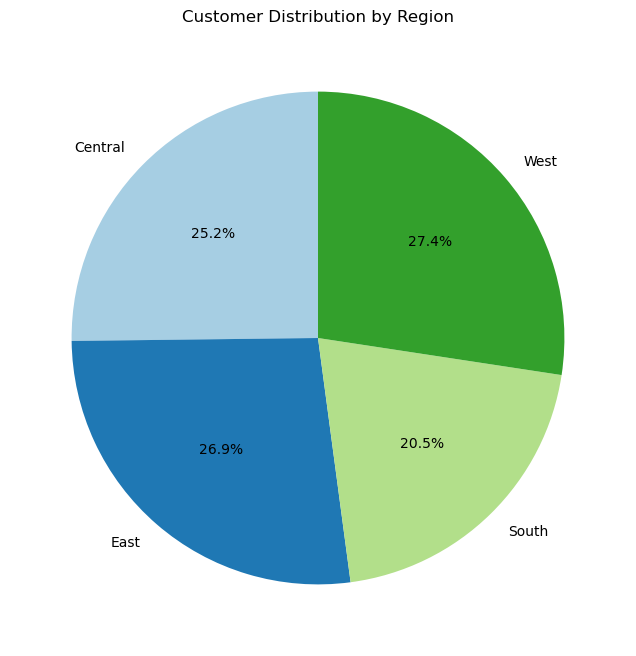

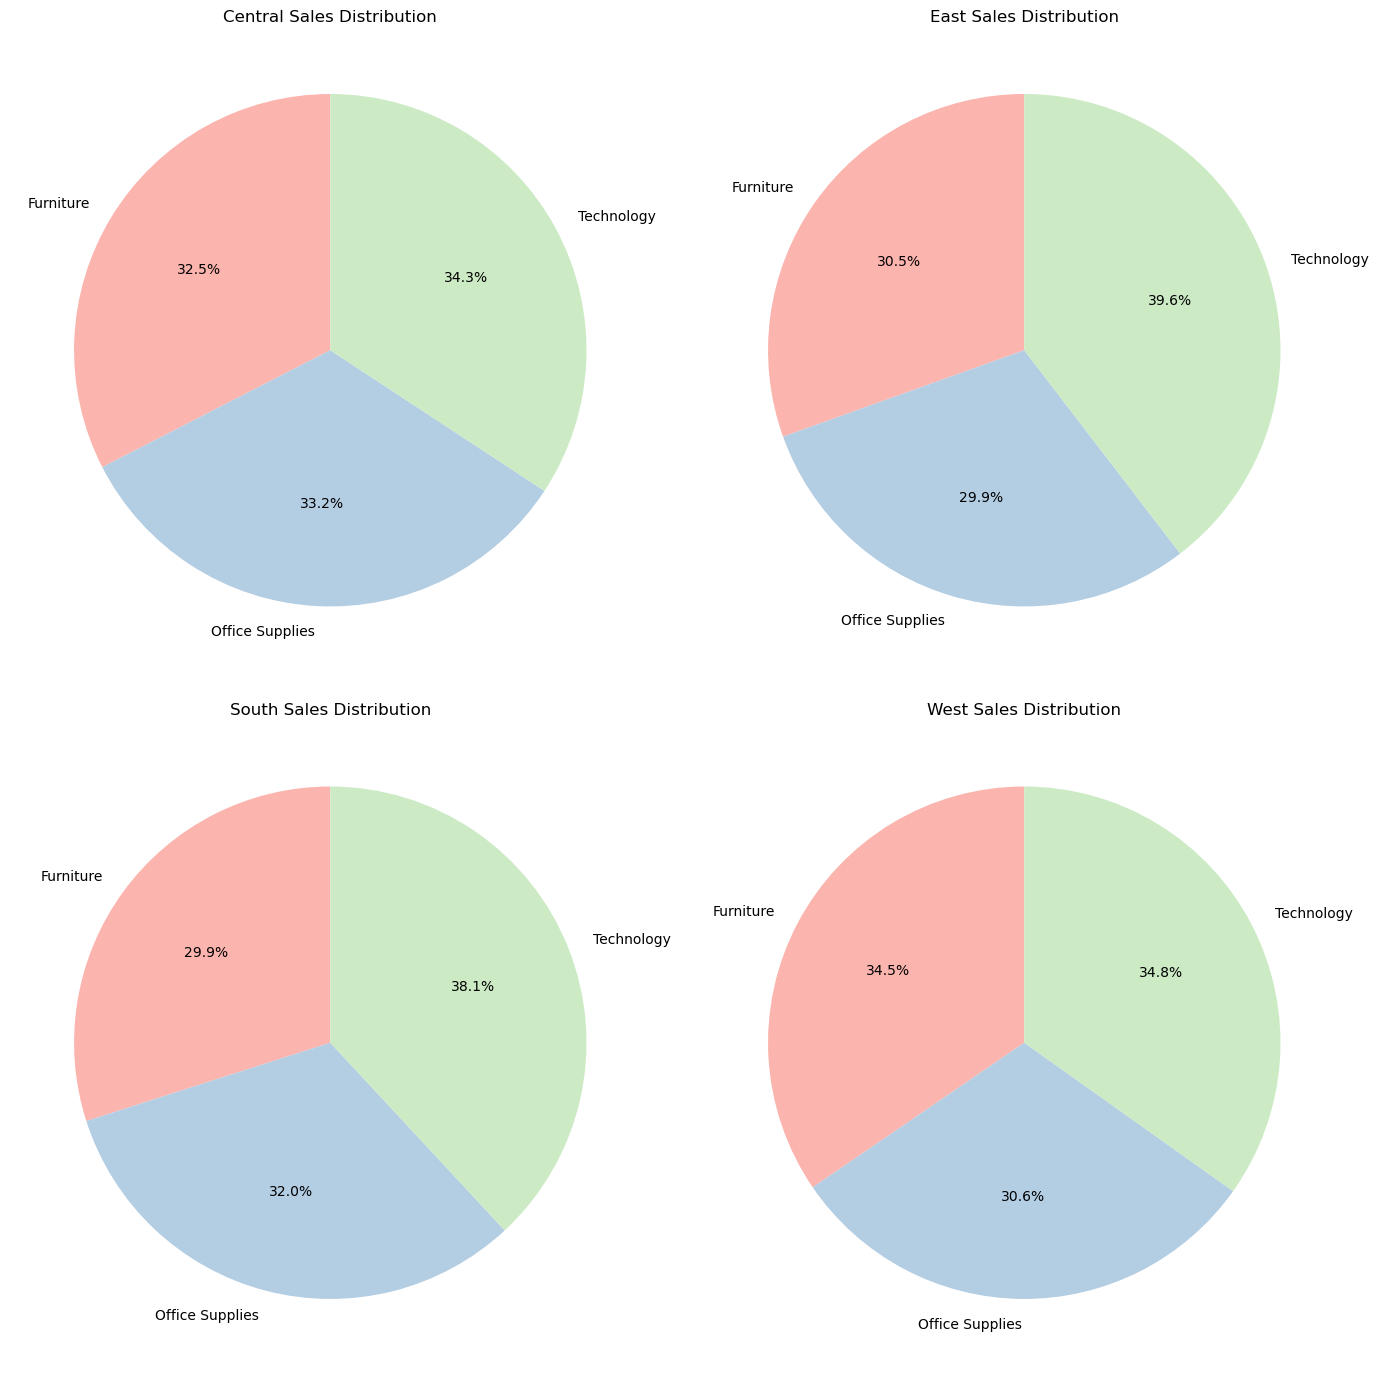

In [20]:
customer_distribution = df.groupby('Region')['Customer ID'].nunique()

category_distribution = df.groupby(['Region', 'Category'])['Sales'].sum().unstack().fillna(0)

customer_distribution, category_distribution

plt.figure(figsize=(8, 8))
customer_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(customer_distribution))))
plt.title('Customer Distribution by Region')
plt.ylabel('')  

fig, axs = plt.subplots(2, 2, figsize=(14, 14))  
axs = axs.flatten()  

for i, region in enumerate(category_distribution.index):
    category_distribution.loc[region].plot(kind='pie', ax=axs[i], autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1(range(len(category_distribution.columns))))
    axs[i].set_title(f'{region} Sales Distribution')
    axs[i].set_ylabel('') 

plt.tight_layout()
plt.show()

**Customer Distribution by Region:**

- This pie chart displays the proportion of unique customers in each region of the United States. The chart reveals that the West region has the largest share of customers, closely followed by the East, while the South has the fewest. This visualization helps businesses understand where their customer base is concentrated, which can inform marketing and distribution strategies.

**Product Category Distribution by Region:**

- Four separate pie charts represent the sales distribution across three product categories—Furniture, Office Supplies, and Technology—in each of the four regions (Central, East, South, West). Each chart highlights the regional preferences or demands for these categories, showing, for instance, a strong preference for Technology in the East and significant sales of Furniture in the West.

In [17]:
total_revenue = df['Sales'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

revenue_by_region = df.groupby('Region')['Sales'].sum()
print("Revenue by Region:")
print(revenue_by_region)

revenue_by_category = df.groupby('Category')['Sales'].sum()
print("Revenue by Category:")
print(revenue_by_category)

Total Revenue: $2,252,607.41
Revenue by Region:
Region
Central    492646.9132
East       660589.3560
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64
Revenue by Category:
Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64


- The best option for a larger marketing budget is the West area. With -  710,219.68  in  the  total  sales  revenue roughly 31.5 % of the $ 2,252,607.41 in overall revenue—it has the greatest revenue of any region. The "Customer Distribution by Region" pie chart shows that this region has the largest customer base in addition to making a major contribution to overall sales.

- It would be best to concentrate on the Technology category within the West area. The pie charts under "Product Category Distribution by Region" demonstrate that Technology is the category with the largest revenue of the three, continuously generating substantial revenue in all regions with a total of $ 825,856.11. In particular, technology and furniture do well in sales in the West, suggesting a solid level of market receptivity and room for expansion.

### What was the highest sales amount recorded? Who was the customer involved in this transaction? How can we encourage this customer to continue their purchases?

In [18]:
df[df["Sales"] == df["Sales"].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2696,2698,CA-2015-145317,2015-03-18,23/03/15,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48


$22,638.48 was the biggest sales amount ever recorded. In this transaction, a Cisco TelePresence System EX90 videoconferencing equipment was sold. It fell under the Technology category, namely the Machines subcategory. Sean Miller, who falls within the "Home Office" group, was the client involved in this noteworthy purchase. On March 18, 2015, the order was placed, and it was transported to Jacksonville, Florida, via Standard Class delivery.

Personalized marketing techniques could be used to persuade Sean Miller to keep making large purchases. It looks like that Sean works in the home office sector, customized communications showcasing the newest technological advancements—particularly those that improve the ability to work remotely—might be very successful. He might be further motivated if we provide him with special offers, loyalty points, and details about products that go well with your earlier purchases, such as the Cisco TelePresence system. Furthermore, providing top-notch after-sale service and consistent interaction via technology webinars or customized mailings can boost client happiness and loyalty and promote repeat business.